# Visualizing Segmentations of an Image in Context

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

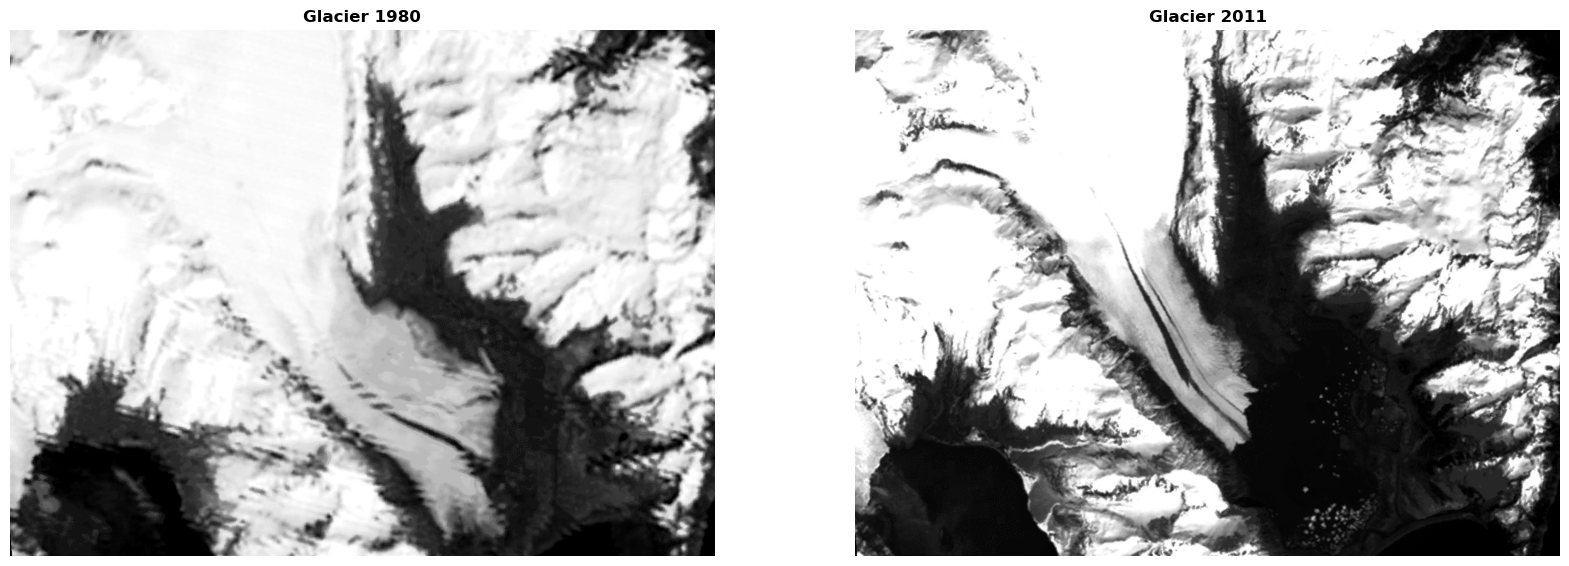

In [2]:
glacier_1980 = cv2.imread('./images/bearGlacier1980.png') # By default converts image to the 3 channel BGR color image
glacier_1980 = cv2.cvtColor(glacier_1980, cv2.COLOR_BGR2GRAY) # Converts an image from one color space to another
_, binary_1980 = cv2.threshold(glacier_1980, 127, 255, cv2.THRESH_OTSU) # https://en.wikipedia.org/wiki/Otsu%27s_method

glacier_2011 = cv2.imread('./images/bearGlacier2011.png') # By default converts image to the 3 channel BGR color image
glacier_2011 = cv2.cvtColor(glacier_2011, cv2.COLOR_BGR2GRAY) # Converts an image from one color space to another
_, binary_2011 = cv2.threshold(glacier_2011, 127, 255, cv2.THRESH_OTSU) # https://en.wikipedia.org/wiki/Otsu%27s_method

fig, axs = plt.subplots(1, 2, figsize=(20, 20))
axs[0].imshow(glacier_1980, cmap='gray')
axs[0].set_title('Glacier 1980')
axs[0].axis("off")
axs[1].imshow(glacier_2011, cmap='gray')
axs[1].set_title('Glacier 2011')
axs[1].axis("off")
plt.show()

Burn a mask onto an image. The output is an image that is the same as the original everywhere the mask is 0 and is "burned" yellow where the mask is 1.

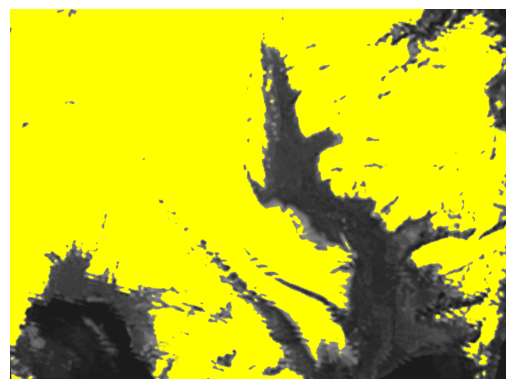

In [3]:
glacier = glacier_1980.copy()
glacier = cv2.cvtColor(glacier, cv2.COLOR_GRAY2RGB) # Converts an image from one color space to another
glacier[binary_1980 == 255] = (255, 255, 0)
plt.imshow(glacier)
plt.axis("off")
plt.show()

Areas not covered with ice, some of it is water and some is land at the coastline. Now it is "burned" yellow where the mask is 0.

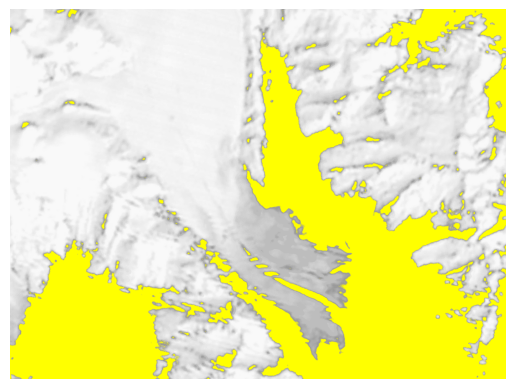

In [4]:
land_sea = glacier_1980.copy()
land_sea = cv2.cvtColor(land_sea, cv2.COLOR_GRAY2RGB) # Converts an image from one color space to another
land_sea[binary_1980 == 0] = (255, 255, 0)
plt.imshow(land_sea)
plt.axis("off")
plt.show()

Burning the inverted 1980 mask onto the binary 2011 image will show the 2011 glacier set against its former footprint. White pixels were glacier in 2011, yellow pixels represent areas that were not part of the glacier in 1980, and the black pixels in between is the lost glacier.

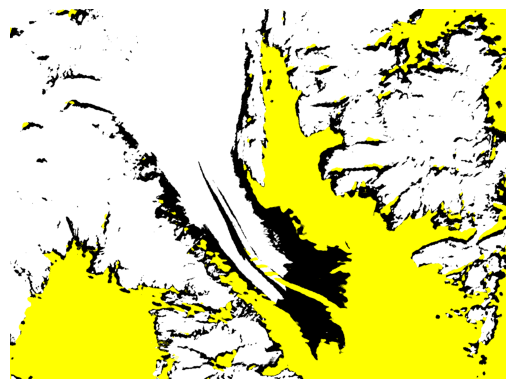

In [5]:
coastline_1980 = binary_2011.copy()
coastline_1980 = cv2.cvtColor(coastline_1980, cv2.COLOR_GRAY2RGB) # Converts an image from one color space to another
coastline_1980[binary_1980 == 0] = (255, 255, 0)
plt.imshow(coastline_1980)
plt.axis("off")
plt.show()